In [1]:
import numpy as np
import pandas as pd
from scipy import stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Data: speed of light
The following dataset consists of the results of a classic Michelson experiment (1880) - speed of light was measured with a rotating mirror. Could the measurements be well aproximated by normal distribution?

In [2]:
light_data = pd.read_csv('light speed.txt', sep='\t', header=None)
light_data.columns = ['speed']
light_data.head()

,speed
0,299850
1,299740
2,299900
3,300070
4,299930


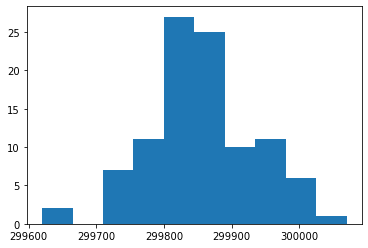

In [3]:
pylab.hist(light_data.speed);

q-q plot for our sample:

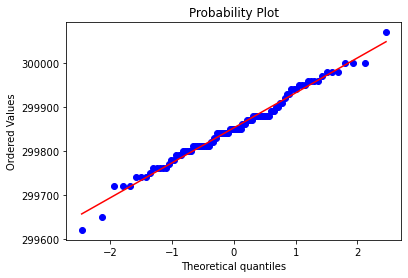

In [4]:
stats.probplot(light_data.speed, dist = "norm", plot = pylab);

You can see that the points lie quite close to the line, which means that the sample is quite well approximated by normal distribution. But let's use statistical tests to check the ormality more formally.

# Chi-squared goodness-of-fit test
$H_0$: speed of light measurements come from normal distibution

$H_1$: $H_0$ is false

To run chi-squared test, we need to:
1. create bins over the sample's range
2. count the number of observations in each bin
3. estimate parameters of the distribution we assume in $H_0$ (in this case, $H_0$ states normal distribution, se we need to estimate its mean and variance)
4. calculate expected counts in all bins under that distribution
5. compare observed and expected counts with chi-squared test

Let's take 1 and 2 from the standard histogram we just plotted:

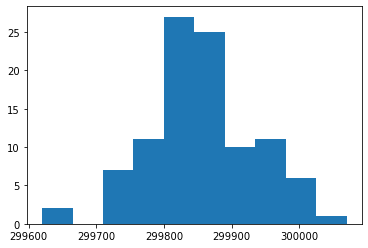

In [5]:
tmp = pylab.hist(light_data.speed)
bins = tmp[1]
observed_counts = tmp[0]

3 – to fit normal distribution to the data, we need to estimate its mean and variance. We'll use sample mean and variance:

In [6]:
h0_dist = stats.norm(loc = light_data.speed.mean(), scale = light_data.speed.std(ddof=1))

4 – expected counts:

In [7]:
cdf_at_bin_boundaries = h0_dist.cdf(bins)
expected_counts = [len(light_data) * (t - s) for s, t in zip(cdf_at_bin_boundaries, cdf_at_bin_boundaries[1:])]

5 – finally, let's compare the counts:

In [8]:
stats.chisquare(f_obs = observed_counts, f_exp = expected_counts,
                ddof = 2) # because we estimated two parameters of the distribution from the sample


Power_divergenceResult(statistic=12.24548630525224, pvalue=0.09276947469231883)

# Anderson-Darling test
There's a finction is scipy for Anderson-Darling test! For some reason it only allows to test if the sample comes from one of these distributions: ‘norm’, ‘expon’, ‘logistic’, ‘gumbel’, ‘gumbel_l’, ‘gumbel_r’, ‘extreme1’. Luckily, normal distribution is one of them, so we can use the function for our problem:

In [9]:
stats.anderson(light_data.speed, dist='norm')

AndersonResult(statistic=0.46076385565218914, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Wow, the function does not actually calculate p-value - instead it returns something very oldschool: value fo the statistic and a table of critical values it should be compared with. Critical values are precomputed for significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), which means $\alpha$ = [0.15, 0.1, 0.05, 0.025, 0.01]. 

In our case the value of the statistic 0.46 is smaller than the largest critical value corresponding to $\alpha=0.15$, which means that for our data $p>0.15$ and null hypothesis is not rejected at 0.05.

Just to make sure you understand how to work with critical values: assume you had observed value of the statistic equal to 0.8. It lies between critical values for $\alpha=0.05$ and $\alpha=0.025$, which means that the p-value is between 0.025 and 0.05.

R is so much better at this!

# Shapiro-Wilk test
If you need to test normality, the best choice is Shapiro-Wilk test: it is designed specifically to test the hypothesis of normality, and has higher power than more general chi-squared and Anderson-Darling tests (which in theory can test hypothesis that your sample comes from any distribution).

In [10]:
stats.shapiro(light_data.speed)

ShapiroResult(statistic=0.9880793690681458, pvalue=0.5140784382820129)

Again, the null hypothesis is not rejected.